# Exercício de Regressão: Predição de Ruído de Aeroflóquio

## Objetivo
Prever o nível de ruído (em decibéis) gerado por aeroflóquios com base em características aerodinâmicas, utilizando diferentes modelos de machine learning.

## Base de Dados: `airfoil_self_noise`
Dataset disponível no OpenML com medições experimentais de ruído em aeroflóquios da NASA.

### Dicionário de Atributos (Traduzido)
| Nome Original       | Descrição em Português                     | Unidade/Tipo   |
|---------------------|-------------------------------------------|---------------|
| Frequency           | Frequência do som                         | Hertz (Hz)    |
| Angle_of_Attack     | Ângulo de ataque da asa                   | Graus (°)     |
| Chord_Length        | Comprimento da corda aerodinâmica         | Metros (m)    |
| Free_Velocity       | Velocidade do fluxo de ar livre           | Metros/segundo (m/s) |
| Suction_Side        | Espessura da camada de sucção/displacamento | Metros (m)    |
| Scaled_Sound        | Nível de pressão sonora escalonado (target)| Decibéis (dB) |

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
airfoil = fetch_openml(name='airfoil_self_noise', version=1, as_frame=True, parser='pandas')
X = airfoil.data
y = airfoil.target.astype(float)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
def avaliar_modelo(y_true, y_pred, nome="Modelo"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{nome} - RMSE: {rmse:.2f}")

## Regressão Linear

In [7]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

pred_lr = modelo_lr.predict(X_test)
avaliar_modelo(y_test, pred_lr, "Regressão Linear")

Regressão Linear - RMSE: 4.70


## Árvore de Regressão

In [8]:
modelo_tree = DecisionTreeRegressor(random_state=42)
modelo_tree.fit(X_train, y_train)

pred_tree = modelo_tree.predict(X_test)
avaliar_modelo(y_test, pred_tree, "Árvore de Regressão")

Árvore de Regressão - RMSE: 2.42


## Random Forest Regressor

In [9]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

pred_rf = modelo_rf.predict(X_test)
avaliar_modelo(y_test, pred_rf, "Random Forest")

Random Forest - RMSE: 1.81


## Support Vector Regressor (SVR)

In [10]:
modelo_svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))
modelo_svr.fit(X_train, y_train)

pred_svr = modelo_svr.predict(X_test)
avaliar_modelo(y_test, pred_svr, "SVR")

SVR - RMSE: 2.64


## Comparando ...

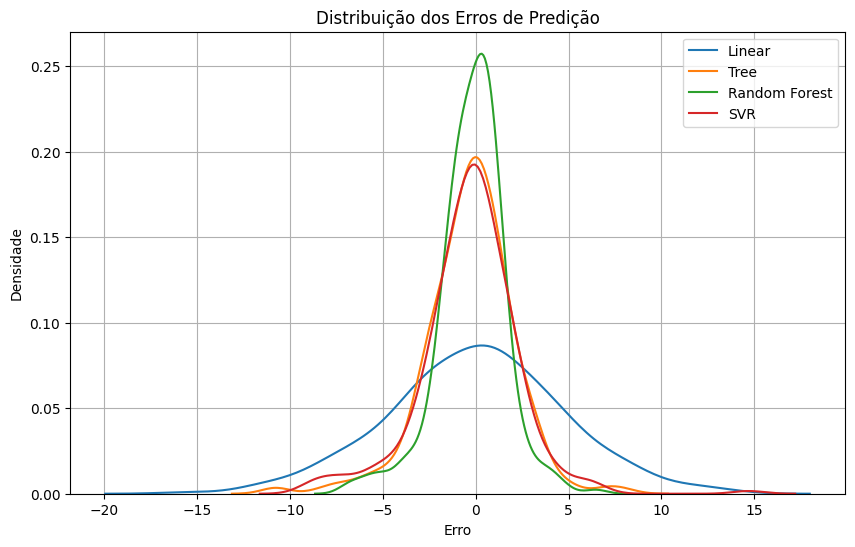

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test - pred_lr, label="Linear")
sns.kdeplot(y_test - pred_tree, label="Tree")
sns.kdeplot(y_test - pred_rf, label="Random Forest")
sns.kdeplot(y_test - pred_svr, label="SVR")

plt.title("Distribuição dos Erros de Predição")
plt.xlabel("Erro")
plt.ylabel("Densidade")
plt.grid(True)
plt.legend()
plt.show()